# Zero Shot Image Classification demo.

## A. Documentation.

- [Huggingface: Zero shot image classification ](https://huggingface.co/tasks/zero-shot-image-classification)
- [Huggingface: Open AI CLIP model (path14)](https://huggingface.co/openai/clip-vit-large-patch14)
- [Open AI: Clip](https://openai.com/research/clip)

In [1]:
!pip install transformers
!pip install torch
!pip install Pillow

In [3]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt

In [4]:
# Models: Zero-Shot Image Classification

OPENAI_CLIP_VIT_LARGE_PATCH_14 = "openai/clip-vit-large-patch14"
OPENAI_CLIP_VIT_LARGE_PATCH_16 = "openai/clip-vit-large-patch16" # Needs auth token.
OPENAI_CLIP_VIT_LARGE_PATCH_32 = "openai/clip-vit-large-patch32" # Needs auth token.

In [7]:
# Select and load pretrained model from huggingface.

model_name = OPENAI_CLIP_VIT_LARGE_PATCH_14

model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [8]:
def give_me_probabilities_about_the_image(url:str, user_sentences_input:list) -> None:
    """
        Function that recives the url image and the user sentence inputs
        to detect the sentence with the highest probability of success.
    """
    image = Image.open(requests.get(url, stream=True).raw)

    inputs = processor(text=user_text_inputs, images=image, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

    values = probs.detach().tolist()

    print("\nSentences input probabilities:\n")
    for index, item in enumerate(values[0]):
        print(f'Sentence {index + 1}: {"{:.2f}".format(item)} => {user_sentences_input[index]}')

    plt.imshow(image)
    print(f'\nImage shape (width, height): {image.size}')

# Examples

## A. Example


Sentences input probabilities:

Sentence 1: 0.08 => the photo contains one cat
Sentence 2: 0.00 => the photo contains a animal
Sentence 3: 0.17 => the photo contains ten cats
Sentence 4: 0.00 => the photo contains a car
Sentence 5: 0.75 => the photo contains two cats
Sentence 6: 0.00 => the photo contains something else

Image shape (width, height): (640, 480)


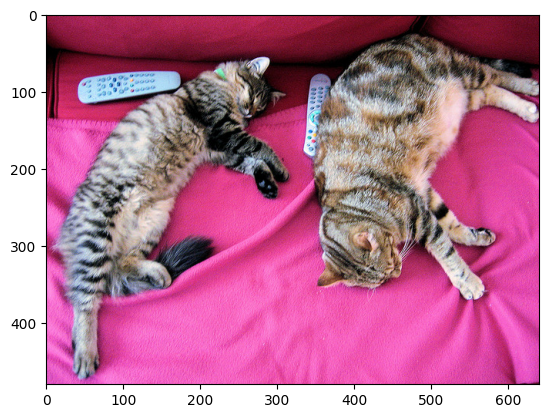

In [9]:
# Description URL_A: Two cats.
URL = "http://images.cocodataset.org/val2017/000000039769.jpg"

user_text_inputs = [
    "the photo contains one cat",
    "the photo contains a animal",
    "the photo contains ten cats",
    "the photo contains a car",
    "the photo contains two cats",
    "the photo contains something else"
]

give_me_probabilities_about_the_image(
    url=URL,
    user_sentences_input=user_text_inputs)

## B. Example


Sentences input probabilities:

Sentence 1: 0.00 => the photo contains a man with a beer
Sentence 2: 0.13 => the photo contains a woman, a man and a printer
Sentence 3: 0.65 => the photo contains a man and a printer
Sentence 4: 0.21 => the photo contains a woman and a printer
Sentence 5: 0.01 => the photo contains a printer
Sentence 6: 0.00 => the photo contains something else

Image shape (width, height): (183, 275)


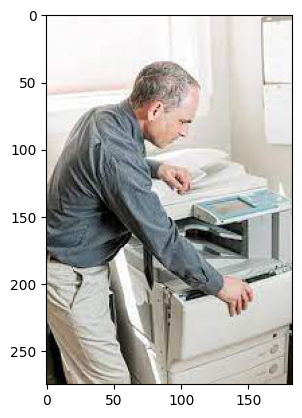

In [10]:
# Description URL_B: A man and a printer.
URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-b2AfN8NHfkppemfTv1U7btZx6RvKJqr1uyDBDKlDUJAbda97PY63UKXhaOZQZujkYas&usqp=CAU"

user_text_inputs = [
    "the photo contains a man with a beer",
    "the photo contains a woman, a man and a printer",
    "the photo contains a man and a printer",
    "the photo contains a woman and a printer",
    "the photo contains a printer",
    "the photo contains something else"
]

give_me_probabilities_about_the_image(
    url=URL,
    user_sentences_input=user_text_inputs)

##  C. Example


Sentences input probabilities:

Sentence 1: 0.06 => the photo contains a man and a printer
Sentence 2: 0.21 => the photo contains a woman and a printer
Sentence 3: 0.06 => the photo contains a car, a woman and a printer
Sentence 4: 0.67 => the photo contains a woman, a man and a printer
Sentence 5: 0.00 => the photo contains a printer
Sentence 6: 0.00 => the photo contains something else

Image shape (width, height): (400, 300)


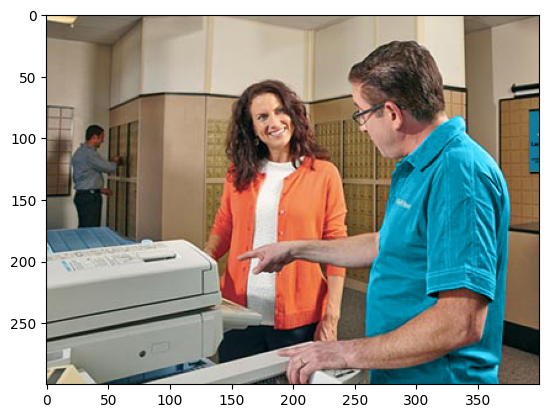

In [11]:
# Description URL_C: A man, a woman and a printer.
URL = "https://www.theupsstore.com/Image%20Library/theupsstore/general-content/gc1/gc1_print-copies.jpg"

user_text_inputs = [
    "the photo contains a man and a printer",
    "the photo contains a woman and a printer",
    "the photo contains a car, a woman and a printer",
    "the photo contains a woman, a man and a printer",
    "the photo contains a printer",
    "the photo contains something else"
]

give_me_probabilities_about_the_image(
    url=URL,
    user_sentences_input=user_text_inputs)

## D. Example


Sentences input probabilities:

Sentence 1: 0.10 => the photo contains a man and a printer
Sentence 2: 0.18 => the photo contains a woman with blue shirt and a printer
Sentence 3: 0.25 => the photo contains a woman and a printer
Sentence 4: 0.02 => the photo contains a printer
Sentence 5: 0.45 => the photo contains a woman with pink shirt and a printer
Sentence 6: 0.00 => the photo contains something else

Image shape (width, height): (740, 317)


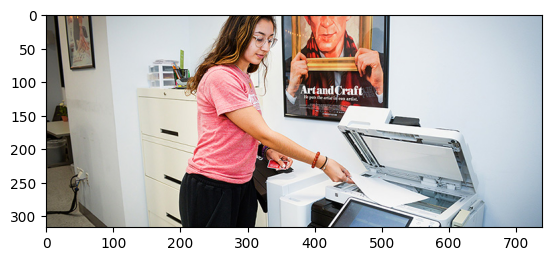

In [57]:
# Description URL_D: A woman with pink shirt and a printer.
URL = "https://www.sacredheart.edu/media/shu-media/information-technology/Print_Facilities_740x317.jpg"

user_text_inputs = [
    "the photo contains a man and a printer",
    "the photo contains a woman with blue shirt and a printer",
    "the photo contains a woman and a printer",
    "the photo contains a printer",
    "the photo contains a woman with pink shirt and a printer",
    "the photo contains something else"
]

give_me_probabilities_about_the_image(
    url=URL,
    user_sentences_input=user_text_inputs)

## E. Example.



Sentences input probabilities:

Sentence 1: 0.62 => the photo contains a printer in the left
Sentence 2: 0.38 => the photo contains a printer in the right
Sentence 3: 0.00 => the photo contains something else

Image shape (width, height): (1024, 326)


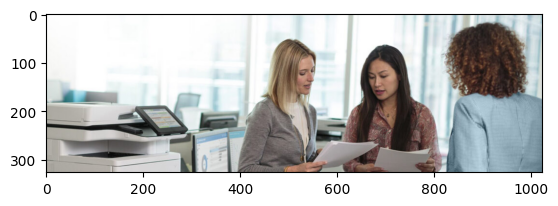

In [58]:
# Description URL_E: A photo with a printer in the left  and three womens.
URL = "https://www.wbm.ca/isl/uploads/2020/11/hp-most-secure-printer-banner-1024x326.jpg"

user_text_inputs = [
    "the photo contains a printer in the left",
    "the photo contains a printer in the right",
    "the photo contains something else"
]

give_me_probabilities_about_the_image(
    url=URL,
    user_sentences_input=user_text_inputs)